# Introduction to Machine Learning
## by Lucas Aledi
#### based on [Udacity's Data Analyst Nanodegree extracurricular](https://www.udacity.com/course/data-analyst-nanodegree--nd002?utm_source=gsem_brand&utm_medium=ads_n&utm_campaign=8305564265_c&utm_term=89468963430&utm_keyword=udacity%20data%20analyst_e&gclid=CjwKCAiA6aSABhApEiwA6Cbm_-5FeQPY08ttIzuVyM-8dod7Mjd3kDrgRi3U-WVK2nOTPLOWkCX9sBoC4h0QAvD_BwE)

### <a href=#table>Table of contents</a>
#### <a href=#lesson1>Lesson 1 - Welcome to Machine Learning</a>
#### <a href=#lesson2>Lesson 2 - Naive Bayes</a>
#### <a href=#lesson3>Lesson 3 - SVM</a>
#### <a href=#lesson4>Lesson 4 - Decision Trees</a>
#### <a href=#lesson5>Lesson 5 - Choose Your Own Algorithm</a>
#### <a href=#lesson6>Lesson 6 - Datasets and Questions</a>
#### <a href=#lesson7>Lesson 7 - Regressions</a>
#### <a href=#lesson8>Lesson 8 - Outliers</a>
#### <a href=#lesson9>Lesson 9 - Clustering</a>
#### <a href=#lesson10>Lesson 10 - Feature Scaling</a>
#### <a href=#lesson11>Lesson 11 - Text Learning</a>
#### <a href=#lesson12>Lesson 12 - Feature Selection</a>
#### <a href=#lesson13>Lesson 13 - PCA</a>
#### <a href=#lesson14>Lesson 14 - Validation</a>
#### <a href=#lesson15>Lesson 15 - Evaluation Metrics</a>
#### <a href=#lesson16>Lesson 16 - Tying It All Together</a>
#### <a href=#references>References</a>

[Back to top](#table)
# <a id=lesson1 >Lesson 1 - Welcome to Machine Learning</a>

Topics to add a quick summary (pre-requisites):
- Linear Regression:

Many data sets have an approximately linear relationship between variables. In cases like these, we can predict one variable using a known value for another using a [**best-fit line**](https://www.investopedia.com/terms/l/line-of-best-fit.asp), a line on the form $y= mx + b$ that follows the trends in the data as closesly as possible.
<img src="img/img1.png" width=300 height=300 />
Here, $x$ is called the **predictor variable** and $y$ is often called the **response variable**.

Of course, linear regression is not limited to just one predictor variable. The key concept behind it is the idea that a change in one or more predictor variables will produce a linear change in the response variable.

At its core, ML is about taking in information and expanding on it, so it's natural that techniques from statistics play an important role in ML. It is possible to use statistical techniques to find a best-fit line, by first calculating five values about our data. If we represent our data set as a collection of points on a scatter plot, these values are the [means of $x$ and $y$](https://en.wikipedia.org/wiki/Mean), the [standard deviations of $x$ and $y$](https://en.wikipedia.org/wiki/Standard_deviation), and the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient).



[Back to top](#table)
# <a id=lesson2>Lesson 2 - Naive Bayes</a>

We shall start taking about **supervised classification**. For instance, self-driving cars are one big supervised classification problem. 

**Supervised classification** means that we start with a bunch of examples to which we know the correct answer. In other words, we train the machine by showing what's the right behaviour. This, in some sense, emulates the way humans learn: give them a lot of examples and they will eventually start figuring out what's going on.

In this lesson we gonna se if we can make a car go fast or slow in specific moments using *supervised learning*. We'll look into a terrain classification problem

**Acerous v Non-acerous**<br>
Is a horse acerous or non-acerous?

When looking at a new example, we have to figure out which parts of it to be paying attention to. Those are called **features**. So, when classifying animals, for example, a feature might be the color, the number of legs or whether it has horns and/or antlers. So, acerous are animals lacking horns and/or antlers and, thus, a horse would fit into it. 

That is, in general, what machine learning will be doing. We give it a bunch of examples and each one has a number of features, or attributes that we can use to describe it. And if we can pick out the right feature, and it is giving us the right information, we can classify new examples.

**Features and Labels**<br>
In ML, we often take **features** as input and try to produce (output) **labels**. Let's consider Spotify, for a moment:

It takes a song ("let it go") and extracts its features (intensity, tempo, genre, gender of the voice, etc). Then, the user processes it into one of two categories: *Like* or *Don't Like*.

**Decision Surface and scatter plots**<br>
What ML algorithms do is that they take in data and transforms it into a **decision surface** and they tipically lie between different classes.

**Naive Bayes**<br>
[Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) is a very common algorithm to find a decision surface. We are going to use a python library called [scikit-learn](https://scikit-learn.org/stable/), often abbreviated as **sklearn**, and, of course, *naive bayes*, more specifically [**gaussian naive bayes**](https://scikit-learn.org/stable/modules/naive_bayes.html).

So, let's start with a quick example:

In [ ]:
import numpy as np

# import relevant sklearn algorithm
from sklearn.naive_bayes import GaussianNB

# create training points
X= np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
Y= np.array([1,1,1,2,2,2])

# create classifier
clf= GaussianNB()

# fit/train ML learn the patterns
## X are features
## Y are lables
### this is always true in supervised classification
clf.fit(X,Y)

print(clf.predict([[-0.8, -1]]))

Let's try GaussianNB deployment on terrain data

TypeError: Object of type bytes is not JSON serializable

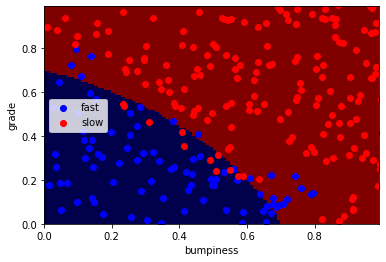

In [3]:
""" 
    Check the code in ClassifyNB.py which contains the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to create a decision 
    boundary and make a plot that visually shows the decision 
    boundary 
"""

from lesson2_terrain_data.prep_terrain_data import makeTerrainData
from lesson2_terrain_data.class_vis import prettyPicture, output_image
from lesson2_terrain_data.ClassifyNB import classify
import numpy as np
import pylab as pl
%matplotlib inline

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("lesson2_terrain_data/test.png",
             "png", open("lesson2_terrain_data/test.png", "rb").read())

**NOTE**

For some reason, this error *(TypeError: Object of type bytes is not JSON serializable)* is shown. But the image is loading successfully. Need to further investigate to understand its causes.

The next thing we need to do is to evaluate our classifier and quantify how well it's doing at classifying points: whether they're terrain that we can drive faster on or terrain that we have to go more slowly.

[There are a number of metrics to evaluate our ML algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234), for example, *logarithmic loss*, *confusion matrix*, *area under curve*, *F1 score*, *mean absolute error*, *mean squared error*. The one we'll use for this case is the *classification accuracy*.

**Accuracy** is just the number of points that are classified correctly divided by the total number of points in the test set. `sklearn` has a function called [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn-metrics-accuracy-score) that takes a bunch of predictions and labels and then goes through them doing an element by element comparison. Let's give it a try:

In [7]:
from lesson2_terrain_data.class_vis import prettyPicture
from lesson2_terrain_data.prep_terrain_data import makeTerrainData
from lesson2_terrain_data.classify import NBAccuracy

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

features_train, labels_train, features_test, labels_test = makeTerrainData()

def submitAccuracy():
    accuracy = NBAccuracy(features_train, labels_train, features_test, labels_test)
    return accuracy

submitAccuracy()

0.884

One thins that has become obvious so far is that we have been using 2 sets of data: one for training and other for testing the algorithm. That's actually really important: **in ML, we always train and test on different data**. If we don't pay attention to this, what can happen is we could [**overfit**](https://en.wikipedia.org/wiki/Overfitting) to our training data. That's to say, we can think that we know better what's going on than we actually know. So, throuhgh out this lessons, we'll keep 10% of data as our test set.

[**Bayes' Theorem and Conditional Probability**](https://brilliant.org/wiki/bayes-theorem/)

Bayes rule provides us with a way to update our beliefs based on the arrival of new, relevant pieces of evidence. In other words, it centers on relating conditional probabilities. A conditional probability is an expression of how probable one event is *given that* some other event occurred (a fixed value). 

For example, if we were trying to provide the probability that a given person has cancer, we would initially just say it is whatever percent of the population has cancer. However, given additional evidence such as the fact that the person is a smoker, we can update our probability, since the probability of having cancer is higher given that the person is a smoker. This allows us to utilize prior knowledge to improve our probability estimations. 

The below equation is Bayes rule:

<img src="img/img2.png" width=300 height=300 />

In this formula, **A** is the event we want the probability of, and **B** is the new evidence that is related to A in some way.

`P(A|B)` is called the **posterior**; this is what we are trying to estimate. In the above example, this would be the *“probability of having cancer given that the person is a smoker”*.

`P(B|A)` is called the **likelihood**; this is the probability of observing the new evidence, given our initial hypothesis. In the above example, this would be the *“probability of being a smoker given that the person has cancer”*.

`P(A)` is called the **prior**; this is the probability of our hypothesis without any additional prior information. In the above example, this would be the *“probability of having cancer”*.

`P(B)` is called the **marginal likelihood**; this is the total probability of observing the evidence. In the above example, this would be the *“probability of being a smoker”*. In many applications of Bayes Rule, this is ignored, as it mainly serves as normalization.

[**Why is it called Naïve Bayes?**](https://www.javatpoint.com/machine-learning-naive-bayes-classifier)

*Naïve*: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

*Bayes*: It is called Bayes because it depends on the principle of Bayes' Theorem described above.


**Naïve Bayes Strengths and Weaknesses**
A couple of things NB does really elegantly:
- Easy to implement;

A few things NB doesn't do as well:
- It easily breaks (e.g., Google and Chicago Bulls);
- Phrases with similar words but distinct meanings don't work well.

So, choosing the right algorithm depends on the problem we're trying to solve and the data set we have to solve it. We shouldn't think of supervised classification algorithms as black boxes. But, instead, we should of it in terms of the theoretical understanding of how the algorithm works and whether that's right for our problem and data set.

[Back to top](#table)
# <a id=lesson3>Lesson 3 - SVM or Support Vector Machine</a>
Invented by [Vladimir Vapnik](https://g.co/kgs/NtbgEf), Support Vector Machine or SVM is a fairly new algorithm in machine learning. Very superficially, what SVM does is to find a line, more generally called a hyperplane, between data of two classes.

<table><tr>
<td><img src="img/img3.png" width=300 height=300 /><br/>possible lines</td> 
<td><img src="img/img4.png" width=300 height=300 /><br/>line that maximizes margin</td>
</tr></table>



[Back to top](#table)
# <a href=lesson4>Lesson 4 - Decision Trees</a>


[Back to top](#table)
# <a id=lesson5>Lesson 5 - Choose Your Own Algorithm</a>


[Back to top](#table)
# <a id=lesson6>Lesson 6 - Datasets and Questions</a>


[Back to top](#table)
# <a id=lesson7>Lesson 7 - Regressions</a>


[Back to top](#table)
# <a id=lesson8>Lesson 8 - Outliers</a>


[Back to top](#table)
# <a id=lesson9>Lesson 9 - Clustering</a>


[Back to top](#table)
# <a id=lesson10>Lesson 10 - Feature Scaling</a>


[Back to top](#table)
# <a id=lesson11>Lesson 11 - Text Learning</a>


[Back to top](#table)
# <a id=lesson12>Lesson 12 - Feature Selection</a>


[Back to top](#table)
# <a id=lesson13>Lesson 13 - PCA</a>


[Back to top](#table)
# <a id=lesson14>Lesson 14 - Validation</a>


[Back to top](#table)
# <a id=lesson15>Lesson 15 - Evaluation Metrics</a>


[Back to top](#table)
# <a id=lesson16>Lesson 16 - Tying It All Together</a>


[Back to top](#table)
# <a id=references>References</a>

Naïve Bayes:
- [best-fit line](https://www.investopedia.com/terms/l/line-of-best-fit.asp)
- [means of $x$ and $y$](https://en.wikipedia.org/wiki/Mean)
- [standard deviations of $x$ and $y$](https://en.wikipedia.org/wiki/Standard_deviation)
- [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient)
- [scikit-learn](https://scikit-learn.org/stable/)
- [gaussian naive bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Metrics to Evaluate your Machine Learning Algorithm](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234)
- [Overfitting in Machine Learning: What It Is and How to Prevent It](https://elitedatascience.com/overfitting-in-machine-learning)
- [What is Bayes Rule?](https://towardsdatascience.com/what-is-bayes-rule-bb6598d8a2fd)
- [Bayes' Theorem and Conditional Probability](https://brilliant.org/wiki/bayes-theorem/)
- [Naïve Bayes Classifier Algorithm](https://www.javatpoint.com/machine-learning-naive-bayes-classifier)

SVM:
- [Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)